# Caso práctico 3 [COLABORATIVO 02]: Solución Agentica NLP

###**Criterio**

**Argumentos**:

<p><b>Transporte</b>: Optimización del Tráfico y la Logística en Tiempo Real
En el transporte, una implementación clave es el análisis de sentimiento y eventos en redes sociales y fuentes de noticias para predecir y gestionar el flujo de tráfico y la logística urbana.</p>


*   **Problema** : Los sistemas de gestión de tráfico tradicionales dependen de sensores fijos (cámaras, bucles inductivos) que no capturan la totalidad de los eventos que afectan la movilidad, como accidentes menores, protestas, eventos deportivos o condiciones peligrosas reportadas por los ciudadanos.
* **Solución con NLP** : Un sistema de NLP puede monitorear en tiempo real plataformas como Twitter, Waze y noticias locales. Es capaz de identificar y clasificar publicaciones que describen incidentes de tráfico, entender su ubicación geográfica (geolocalización) y evaluar su severidad a partir del lenguaje utilizado ("gran accidente", "tráfico detenido", "calle inundada").
* **Impacto** : Permite a las autoridades de tránsito y a las empresas de logística reaccionar de forma proactiva ante disrupciones no detectadas por sensores tradicionales. Esto se traduce en un re-direccionamiento más eficiente de las rutas, una reducción de los congestionamientos, tiempos de entrega más precisos y una mejora en la seguridad vial al alertar a los conductores sobre peligros imprevistos.

<p>A partir de estos argumentos, se requiere que el team se apoye en una red social o la ingenieria de cookies para recomendar al propio usuario o autorizadades plan de acción. El ejercicio NLP busca analizar Cookies u otra contenido social para ofertar al usuario temas de interes. Los temas de interes se pueden enfocar en:</p>

* Deportes/rutinas de ejercicio.
* Peliculas
* Consejos de salud
* Dieta
* Hobie

<p>El cookie o post de red social no posee el todo, por lo cual deben ser combinado con perfiles ampliado de edad y otros datos demograficos de interes.</p>

<p><b>Entregables:</b><p>

* Dataset de perfil y/o Cookies, asi como la fuente de entrenamiento.
* EDA esencial para describir los datos.
* Solucion modular en python (colab, Yupyter, Github, rar/zip).  
* Articulo ciencifico APA con la discusion: intro, marco de referencia, metodo, discusion/result, conclusion [5-10 pags.].
* Video de 3 a 5 minutos con el trabajo colaborativo.

<p><b>Criterio de evaluación:</b><p>
* Dataset y EDA (4 puntos)
* Solucion python (10 puntos)
* Artículo de dibulgación de los hallazgos (6 puntos)


A deep learning approach for detecting traffic accidents from social media data
https://arxiv.org/abs/1801.01528

Traffic accident detection and condition analysis based on social networking data
https://pubmed.ncbi.nlm.nih.gov/33461071/

Traffic-Twitter Transformer: A Nature Language Processing-joined Framework For Network-wide Traffic Forecasting
https://arxiv.org/abs/2206.11078

Enhancing User Recommendations through Context-Driven Natural Language Processing (NLP) and Strategic Feature Selection
https://ijisae.org/index.php/IJISAE/article/view/5436



## **ANALISIS EXPLORATORIO (EDA)**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [8]:
df = pd.read_csv("sample_data/traffic_data.csv")

In [9]:
df.columns

Index(['age', 'gender', 'time_spent', 'platform', 'interests', 'location',
       'demographics', 'profession', 'income', 'indebt', 'isHomeOwner',
       'Owns_Car'],
      dtype='object')

In [14]:
# 1. Descripción general
print("Dimensiones:", df.shape)
print(df.info())
print(df.describe(include='all'))

Dimensiones: (1000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB
None
                age gender   time_spent   platform  interests   location  \
count   1000.000000   1000  1000.000000       1000       1000       1000   
unique          NaN      3          NaN          3          3    

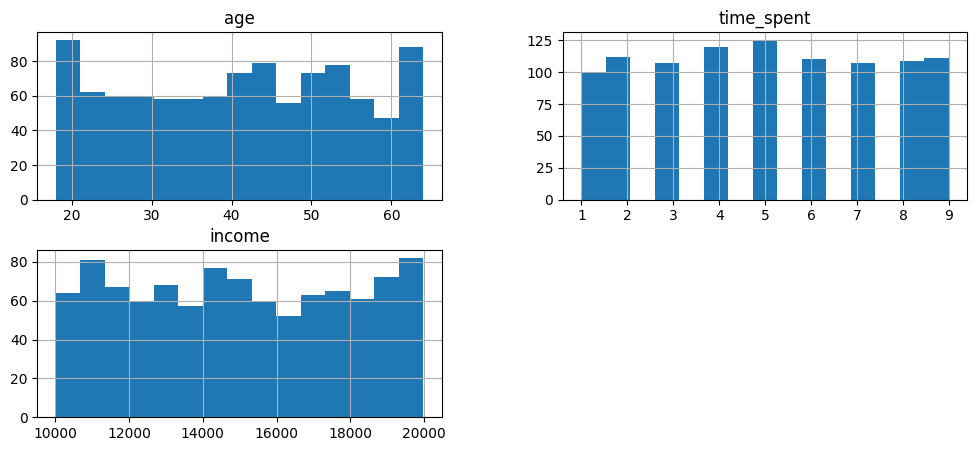

In [15]:

# 2. Distribución de variables numéricas
num_cols = ['age', 'time_spent', 'income']
df[num_cols].hist(bins=15, figsize=(12,5))
plt.show()

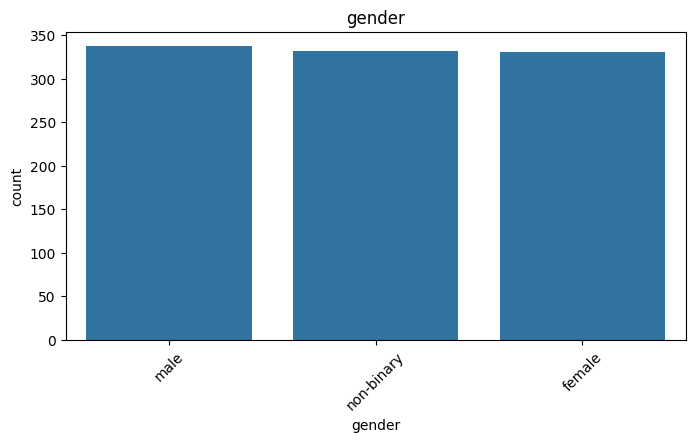

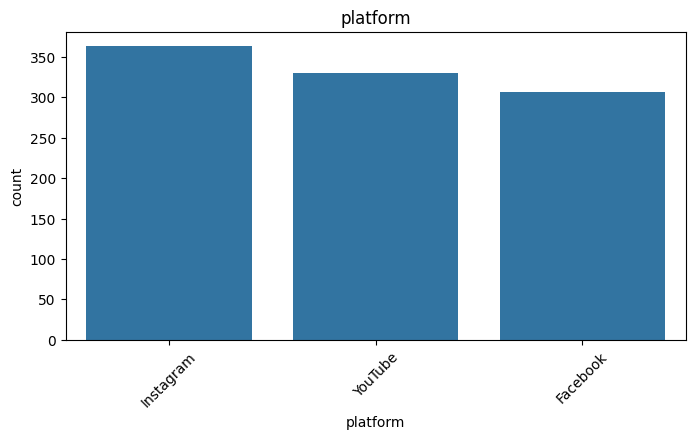

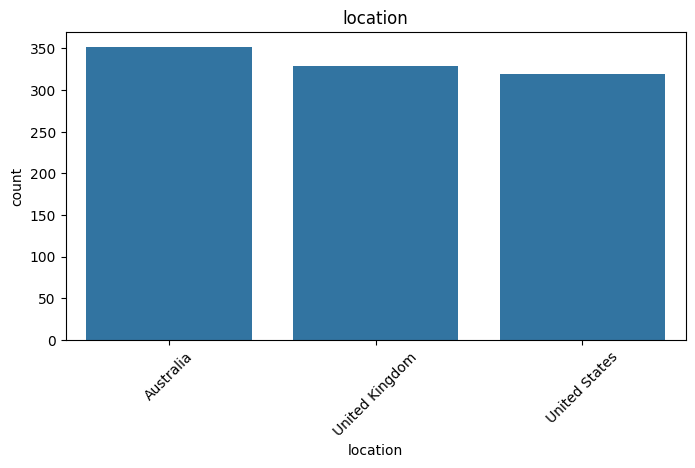

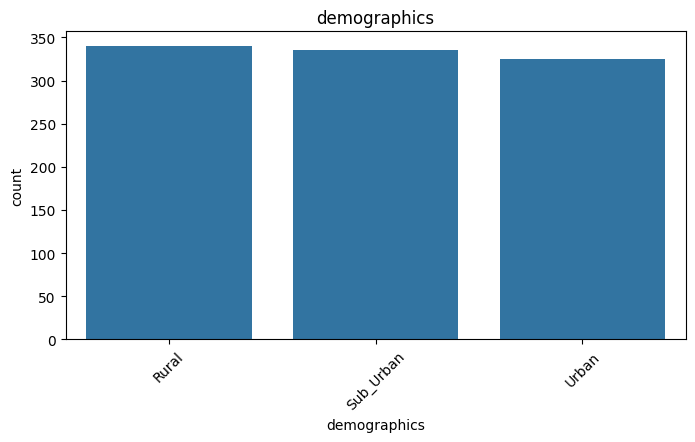

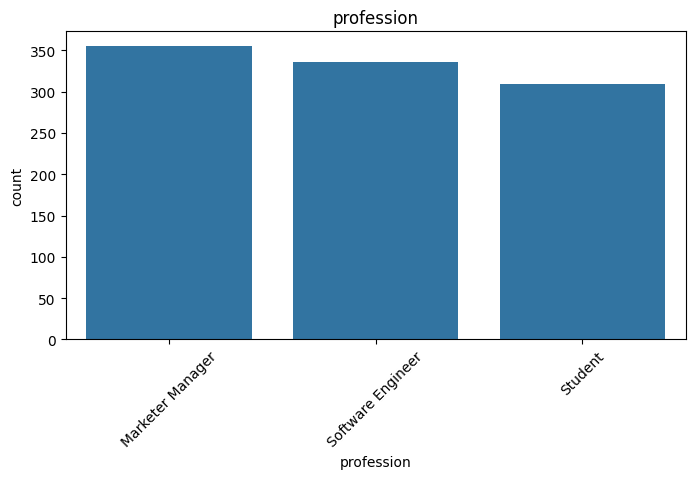

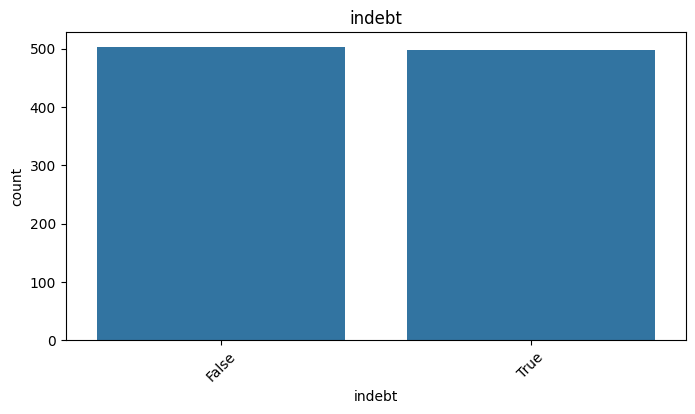

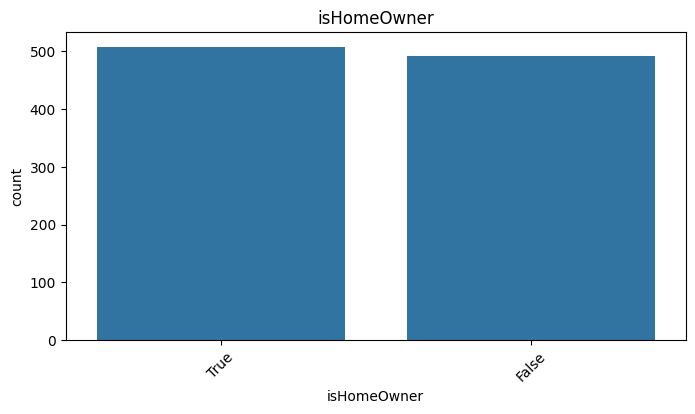

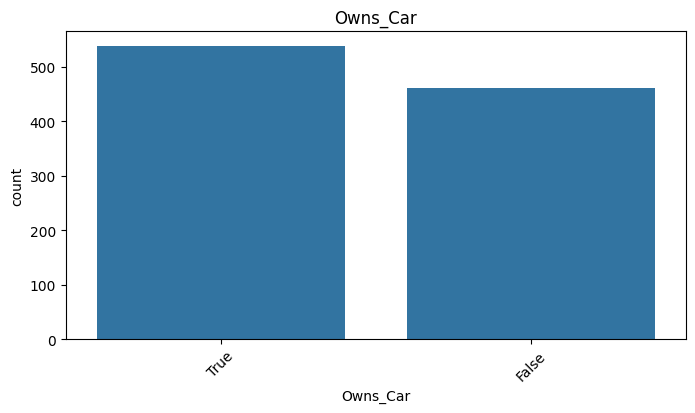

In [16]:
# 3. Distribución de variables categóricas
cat_cols = ['gender', 'platform', 'location', 'demographics', 'profession', 'indebt', 'isHomeOwner', 'Owns_Car']
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

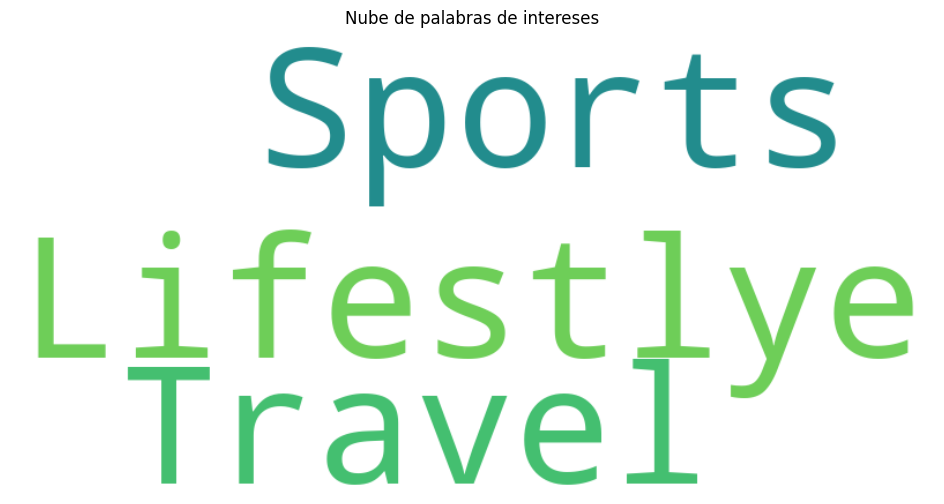

In [17]:
# 4. Intereses
if 'interests' in df.columns:
    text = " ".join(df['interests'].dropna())
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(15,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("Nube de palabras de intereses")
    plt.show()

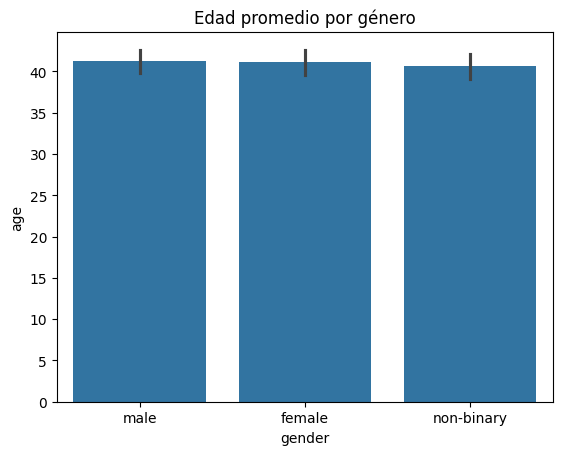

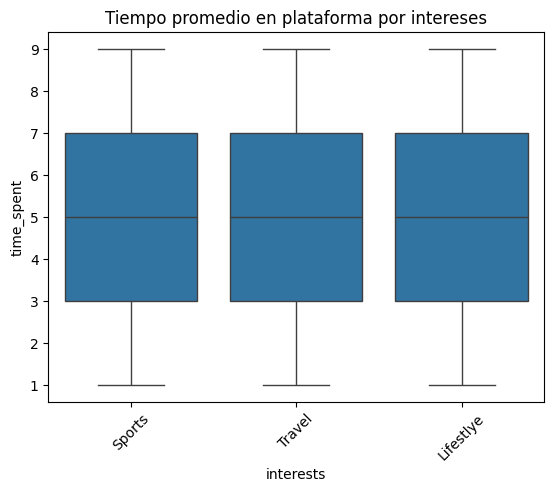

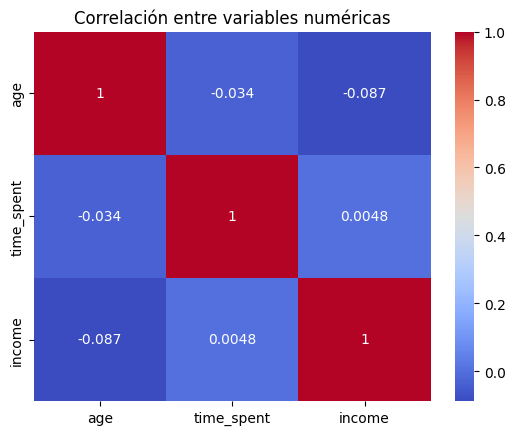

In [19]:
# 5. Cruces interesantes
sns.barplot(x='gender', y='age', data=df)
plt.title("Edad promedio por género")
plt.show()

sns.boxplot(x='interests', y='time_spent', data=df)
plt.xticks(rotation=45)
plt.title("Tiempo promedio en plataforma por intereses")
plt.show()

# 6. Correlaciones
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlación entre variables numéricas")
plt.show()

## **Solucion Modular**

```
project/
│
├── preprocessing.py      # Limpieza de datos y codificación
├── nlp_interests.py      # Clasificación de intereses del usuario
├── recommender.py        # Recomendaciones personalizadas
├── nlp_traffic.py        # Clasificación de eventos de tráfico
├── main.ipynb            # Notebook principal
└── traffic_data.csv      # Dataset de perfiles/cookies
```

In [34]:
# preprocessing
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def load_data(path="sample_data/traffic_data.csv"):
    df = pd.read_csv(path)
    return df

def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = ''.join(c for c in text if c.isalnum() or c.isspace())
    return text

def preprocess(df):
    # Limpiar columna de intereses
    df['interests_clean'] = df['interests'].apply(clean_text)

    # Codificar variables categóricas
    cat_cols = ['gender', 'platform', 'location', 'demographics', 'profession',
                'indebt', 'isHomeOwner', 'Owns_Car']
    encoders = {}
    for col in cat_cols:
        le = LabelEncoder()
        df[col+'_enc'] = le.fit_transform(df[col].astype(str))
        encoders[col] = le

    return df, encoders

In [35]:
# nlp_interests
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

def train_interest_model(df):
    X = df['interests_clean']
    y = df['interests']  # etiquetas: deportes, peliculas, dieta, salud, hobbie

    vectorizer = TfidfVectorizer(max_features=500)
    X_vect = vectorizer.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

    model = MultinomialNB()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print("Reporte clasificación intereses:\n", classification_report(y_test, y_pred))

    return model, vectorizer

In [36]:
#recommender
def recommend_interest(user_profile, model, vectorizer):
    text = user_profile['interests'].lower()
    vect = vectorizer.transform([text])
    pred_category = model.predict(vect)[0]

    recommendations = {
        'deportes': ["Rutina de running", "Tutorial de yoga", "Aplicaciones de tracking deportivo"],
        'peliculas': ["Últimos estrenos en Netflix", "Ranking IMDb", "Cine clásico para ver en casa"],
        'dieta': ["Recetas saludables", "Plan de alimentación semanal", "Apps de conteo de calorías"],
        'salud': ["Consejos de bienestar", "Rutinas de meditación", "Chequeos médicos recomendados"],
        'hobbie': ["Cursos de fotografía", "Tutoriales de manualidades", "Clubes de lectura"]
    }

    return pred_category, recommendations.get(pred_category, [])

In [37]:
#nlp_traffic
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

def train_traffic_model(df):
    # df: columnas ['text', 'category'] -> category: accidente, protesta, evento, clima, normal
    X = df['text'].apply(lambda x: x.lower())
    y = df['category']

    vectorizer = TfidfVectorizer(max_features=500)
    X_vect = vectorizer.fit_transform(X)

    model = MultinomialNB()
    model.fit(X_vect, y)

    return model, vectorizer

def predict_traffic_event(text, model, vectorizer):
    text_vect = vectorizer.transform([text.lower()])
    category = model.predict(text_vect)[0]
    return category

In [38]:
#main
# from preprocessing import load_data, preprocess
# from nlp_interests import train_interest_model
# from recommender import recommend_interest
# from nlp_traffic import train_traffic_model, predict_traffic_event
# import pandas as pd

# 1. Cargar y preprocesar datos de usuarios
df_users = load_data("sample_data/traffic_data.csv")
df_users, encoders = preprocess(df_users)

# 2. Entrenar modelo de intereses
interest_model, interest_vectorizer = train_interest_model(df_users)

# 3. Ejemplo de recomendación
user_profile = {'interests': 'me gusta el futbol y correr', 'age': 28, 'gender': 'M'}
category, recs = recommend_interest(user_profile, interest_model, interest_vectorizer)
print("Categoría predicha:", category)
print("Recomendaciones:", recs)

# 4. Ejemplo tráfico
# Suponiendo df_traffic con columnas ['text', 'category']
# df_traffic = pd.read_csv("dataset_trafico.csv")
# traffic_model, traffic_vectorizer = train_traffic_model(df_traffic)
# ejemplo_evento = "Gran accidente en la calle central, tráfico detenido"
# print("Evento tráfico:", predict_traffic_event(ejemplo_evento, traffic_model, traffic_vectorizer))

Reporte clasificación intereses:
               precision    recall  f1-score   support

   Lifestlye       1.00      1.00      1.00        77
      Sports       1.00      1.00      1.00        60
      Travel       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Categoría predicha: Sports
Recomendaciones: []


<Figure size 600x600 with 0 Axes>

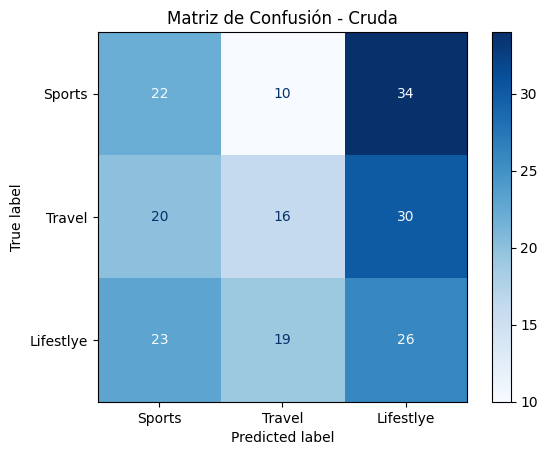

<Figure size 600x600 with 0 Axes>

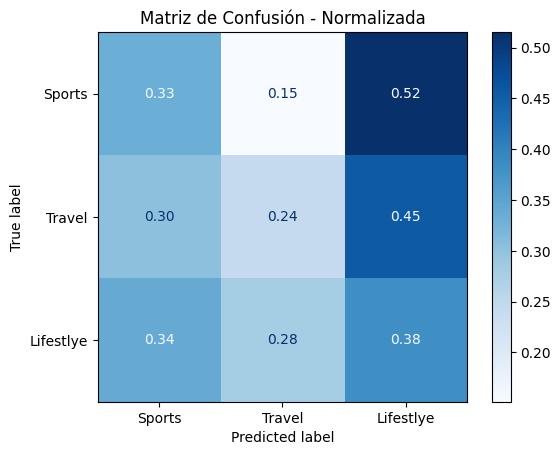

Reporte de clasificación completo:

              precision    recall  f1-score   support

      Sports       0.29      0.38      0.33        68
      Travel       0.34      0.33      0.34        66
   Lifestlye       0.36      0.24      0.29        66

    accuracy                           0.32       200
   macro avg       0.33      0.32      0.32       200
weighted avg       0.33      0.32      0.32       200



In [42]:
# -------------------------------
# 1. Librerías
# -------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# -------------------------------
# 2. Dataset
# -------------------------------
# df = tu dataframe con las columnas que mencionaste

# Features y target
X = df.drop(columns=['interests'])
y = df['interests']

# -------------------------------
# 3. División entrenamiento/prueba
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

# -------------------------------
# 4. Preprocesamiento
# -------------------------------
categorical_features = ['gender', 'platform', 'location', 'demographics', 'profession']
numeric_features = ['age', 'time_spent', 'income']
boolean_features = ['indebt', 'isHomeOwner', 'Owns_Car']

# Pipeline para numéricas
numeric_transformer = StandardScaler()

# Pipeline para categóricas
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combinar
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        # Booleans se dejan como están
        ('bool', 'passthrough', boolean_features)
    ])

# -------------------------------
# 5. Pipeline completo con clasificador
# -------------------------------
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Entrenar modelo
clf.fit(X_train, y_train)

# -------------------------------
# 6. Predicciones
# -------------------------------
y_pred = clf.predict(X_test)

# -------------------------------
# 7. Evaluación
# -------------------------------
classes = y.unique()

# Matriz de confusión cruda
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

plt.figure(figsize=(6,6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Matriz de Confusión - Cruda")
plt.show()

# Matriz de confusión normalizada
cm_norm = confusion_matrix(y_test, y_pred, labels=classes, normalize='true')
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=classes)

plt.figure(figsize=(6,6))
disp_norm.plot(cmap=plt.cm.Blues, values_format='.2f')
plt.title("Matriz de Confusión - Normalizada")
plt.show()

# Reporte de clasificación
print("Reporte de clasificación completo:\n")
print(classification_report(y_test, y_pred, target_names=classes))